#Escribe aquí tu nombre si el file es individual o el nombre de los integrantes del equipo

NOMBRES:

- Alisa Gómez Martínez A01659206
- Yossi Khebzou Dabbah A01028125
- Samuel Schmidt Rovero A01029122
- Jared Alberto Flores Espinosa A01655569
- Carlos Mateos Pérez A01654085
- Manuel Andrés Rodríguez Rivera A01659819

## Puedes pegar aquí abajo lo que obtuviste en la FASE 2

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation 
import numpy as np

In [ ]:
# Aquí puedes poner los valores de las longitudes de las barras L1 y L2 y de las masas m1 y m2
# g es la aceleración de gravedad y no se debe cambiar... :)
L1 = 1
L2 = 1
m1 = 1
m2 = 1
g = 9.81

In [ ]:
def deriv(y, t, L1, L2, m1, m2):
    """
    El sistema regresa las 4 soluciones para theta1, theta1dot, theta2, theta3dot en un array y
    """
    theta1, theta1dot, theta2, theta2dot = y 
    c1 = np.cos(theta1)
    s1 = np.sin(theta1)
    c2 = np.cos(theta2)
    s2 = np.sin(theta2)    
    c12 = np.cos(theta1-theta2)
    s12 = np.sin(theta1-theta2)
        ## Aquí abajo escribe el sistema en z1 y z2
    theta1dotdot = (m2*g*s2*c12 - m2*s12*(L1*theta1dot**2*c12 + L2*theta2dot**2) - (m1+m2)*g*s1) / L1 / (m1 + m2*s12**2)
    theta2dotdot = ((m1+m2)*(L1*theta1dot**2*s12 - g*s2 + g*s1*c12) + m2*L2*theta2dot**2*s12*c12) / L2 / (m1 + m2*s12**2)
    return theta1dot, theta1dotdot, theta2dot, theta2dotdot

In [ ]:
# Aquí creamos un array para el tiempo t 
tmax = 10
dt = 0.02
t = np.arange(0, tmax+dt, dt)

# Condiciones iniciales: theta1, dtheta1/dt, theta2, dtheta2/dt.
y0 = np.array([3*np.pi/7, 0, 3*np.pi/4, 0]) #inicialmente en reposo, las velocidades son 0

# Numerical integration of the equations of motion
y = odeint(deriv, y0, t, args=(L1, L2, m1, m2))

In [ ]:
def V(y):
    '''Energía potencial'''
    th1, th1d, th2, th2d = y.T
    v=-L1*m1*g*np.cos(th1)-L1*m2*g*np.cos(th1)-L2*m2*g*np.cos(th2)
    return v #escribe aquí la energía potencial del sistema
    
def T(y):
    """Energía cinética"""
    th1, th1d, th2, th2d = y.T
    t= ((m1*(L1**2)*(th1d**2))/(2))+(1/2)*m2*((L1**2)*(th1d**2)+(L2**2)*(th2d**2)+2*(L1*th1d*L2*th2d*np.cos(th1-th2)))
    return t #escribe aquí la energía cinética del sistema

def E(y):
    '''Energía total'''
    et= V(y)+T(y)
    return et #escribe aquí la energía total del sistema (T+V)

# Total energy from the initial conditions
E0 = E(y0)

# Desviación debida a la solución numérica 
dE = np.abs(E(y)-E0)
dEmax = np.max(dE)
print("Desviación máxima de la energía total = {}".format(dEmax))

Desviación máxima de la energía total = 1.7832567285935852e-05


In [ ]:
# Del array y tomamos los valores de theta1 y theta2
theta1, theta2 = y[:,0], y[:,2]

# Define las coordenadas cartesianas a partir de los ángulos
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

In [ ]:
y2

array([ 0.48458585,  0.48252785,  0.47634988,  0.46604014,  0.45157945,
        0.43294197,  0.41009601,  0.38300496,  0.35162814,  0.3159215 ,
        0.27583814,  0.2313284 ,  0.18233984,  0.12881681,  0.07070001,
        0.00792622, -0.05957149, -0.13186253, -0.20901581, -0.29109448,
       -0.37814741, -0.47019666, -0.5672204 , -0.66913052, -0.77574439,
       -0.88674978, -1.0016608 , -1.11975996, -1.24001696, -1.360967  ,
       -1.48052135, -1.59568096, -1.70217345, -1.79426733, -1.86553416,
       -1.91128917, -1.93113204, -1.92857592, -1.90853901, -1.87554111,
       -1.83319622, -1.78429879, -1.73102076, -1.67506923, -1.61778902,
       -1.56022677, -1.50317403, -1.44719991, -1.39267772, -1.33980489,
       -1.28861314, -1.23896477, -1.19053326, -1.14277334, -1.09490597,
       -1.04597937, -0.995086  , -0.94171785, -0.88603075, -0.82878058,
       -0.77101233, -0.71376605, -0.65792721, -0.60419298, -0.5530922 ,
       -0.50501978, -0.46026936, -0.41905937, -0.38155272, -0.34

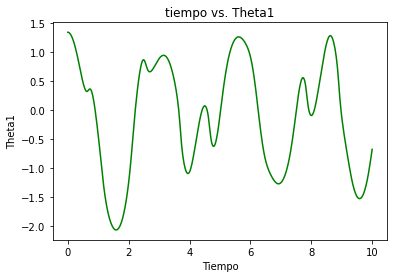

In [ ]:
#Representa en unos gráficos las coordenadas en función del tiempo y los ángulos en función del tiempo
plt.title("tiempo vs. Theta1")
plt.xlabel("Tiempo")
plt.ylabel("Theta1")
plt.plot(t, theta1, color ="green")
plt.show()

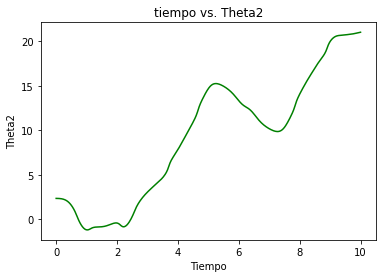

In [ ]:
plt.title("tiempo vs. Theta2")
plt.xlabel("Tiempo")
plt.ylabel("Theta2")
plt.plot(t, theta2, color ="green")
plt.show()

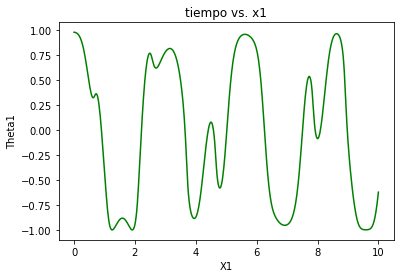

In [ ]:
plt.title("tiempo vs. x1")
plt.xlabel("X1")
plt.ylabel("Theta1")
plt.plot(t, x1, color ="green")
plt.show()

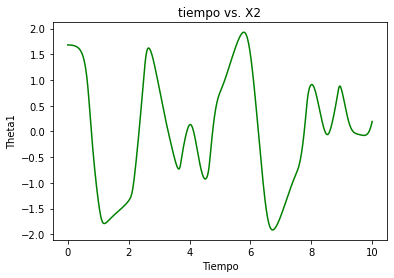

In [ ]:
plt.title("tiempo vs. X2")
plt.xlabel("Tiempo")
plt.ylabel("Theta1")
plt.plot(t, x2, color ="green")
plt.show()

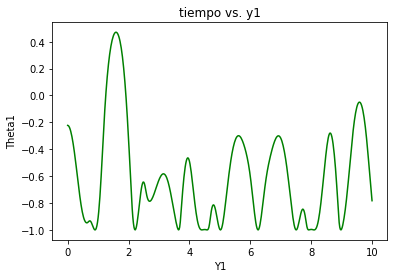

In [ ]:
plt.title("tiempo vs. y1")
plt.xlabel("Y1")
plt.ylabel("Theta1")
plt.plot(t, y1, color ="green")
plt.show()

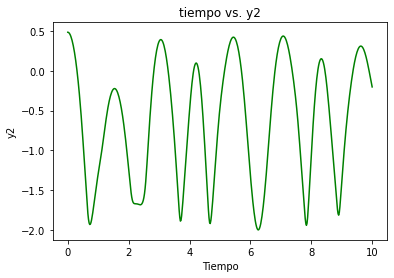

In [ ]:
plt.title("tiempo vs. y2")
plt.xlabel("Tiempo")
plt.ylabel("y2")
plt.plot(t, y2, color ="green")
plt.show()

## FASE 3

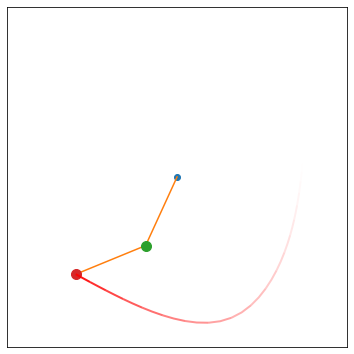

In [ ]:
### Aquí se representa gráficamente la posición del péndulo en cierto momento "i"
i = 50 #Puedes cambiar ese número para visualizar otro momento 

r = 0.25
ns = 20
trail_secs = 1
    
fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

# Usando ax.plot() dibujar un punto que representa el punto, con coordenadas (0,0), donde se cuelga el péndulo
c0 = ax.plot(0,0, "o")

# barras del péndulo
# Usando ax.plot() dibujar las barras del péndulo. Para dibujarlas, usar las coordenadas [0, x1[i], x2[i]] y [0,y1[i],y2[i]] 
# usar la opción lw=2 para unir los puntos con una línea
ax.plot([0, x1[i], x2[i]],[0,y1[i],y2[i]])

# Masas del péndulo
# Usando ax.plot() dibujar dos bolitas que representan las dos masas, con coordenadas x1[i],y1[i] y x2[i],y2[i].
# Usar colores diferentes para las dos masas y usar la opción markersize=10 para el tamaño del marker. 
c1 = ax.plot(x1[i],y1[i],"o", markersize=10)
c2 = ax.plot(x2[i],y2[i],"o", markersize=10)

# En esta parte del código se crea el efecto para visualizar la trayectoria de la segunda masa del péndulo.
s = int(trail_secs / dt) // ns
for j in range(ns):
    imin = i - (ns-j)*s
    if imin < 0: continue
    imax = imin + s + 1
    alpha = (j/ns)**2
    ax.plot(x2[imin:imax], y2[imin:imax], c='r', solid_capstyle='butt',lw=2, alpha=alpha)

## Se muestra el gráfico
ax.set_xlim(-L1-L2-r, L1+L2+r)
ax.set_ylim(-L1-L2-r, L1+L2+r)
ax.set_aspect('equal', adjustable='box')
#plt.axis('off')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.show()

## Animación

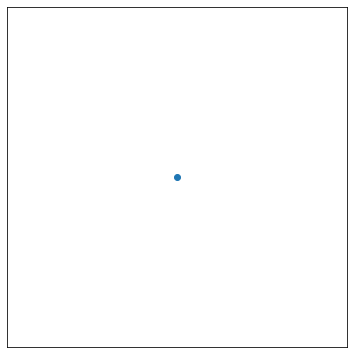

In [ ]:
fig = plt.figure(figsize=(8.3333, 6.25), dpi=72)
ax = fig.add_subplot(111)

## Se repite lo que hiciste para representar un momento i del movimiento, pero creando
# plot "vacíos" para usarlos en la animación para generar un plot por cada momento i

# Dibuja el punto donde se cuelga el péndulo (igual como hiciste arriba)
c0 = ax.plot(0,0, "o")

# barras del péndulo
lines, = ax.plot([],[], lw=2, c='k')

# masas
c1, = ax.plot([],[],'o',markersize=10,color='magenta')
c2, = ax.plot([],[],'o',markersize=10,color='red')

# m2 trail
s = int(trail_secs / dt) // ns
trail = []
for j in range(ns):
    imin = i - (ns-j)*s
    if imin < 0: 
        continue
    imax = imin + s + 1
    alpha = (j/ns)**2
    trail_j, = ax.plot([],[], c='r', solid_capstyle='butt',lw=2, alpha=alpha)
    trail.append(trail_j)

ax.set_xlim(-L1-L2-r, L1+L2+r)
ax.set_ylim(-L1-L2-r, L1+L2+r)
ax.set_aspect('equal', adjustable='box')
#plt.axis('off')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.show()


In [ ]:
import networkx as nx
from matplotlib.animation import FuncAnimation, FFMpegWriter,  PillowWriter 
%matplotlib inline
from IPython.display import HTML, Image

def pendolum_init():
    lines.set_data([],[])
    return (lines,)


### Modificar aquí:
def pendolum_animate(i):
    ## En lines.set_data() poner las coordenadas para dibujar las barras del péndulo
    lines.set_data([0, x1[i], x2[i]],[0,y1[i],y2[i]])
    ## En c1.set_data() poner las coordenadas para dibujar la masa 1
    ## En c2.set_data() poner las coordenadas para dibujar la masa 2
    c1.set_data([x1[i]],[y1[i]])
    c2.set_data([x2[i]],[y2[i]])
    s = int(trail_secs / dt) // ns
    for j in range(ns):
        imin = i - (ns-j)*s
        if imin < 0: continue
        imax = imin + s + 1
        trail[j].set_data(x2[imin:imax],y2[imin:imax])
    return (lines,)

anim = FuncAnimation(fig,pendolum_animate,frames=range(len(x1)),init_func=pendolum_init,blit=True)

In [ ]:
len(y2)

501

In [ ]:
HTML(anim.to_html5_video())